In [241]:
from msdm.algorithms.entregpolicyiteration import entropy_regularized_policy_iteration
from msdm.domains import GridWorld
from msdm.algorithms import ValueIteration
from msdm.core.problemclasses.mdp import TabularPolicy
import numpy as np
import torch
from frozendict import frozendict


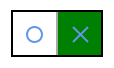

In [73]:
# Create a gridworld
gw = GridWorld(
    tile_array=[
        "sg"
    ],
    feature_rewards={
        'g': 10,
        '.': 0,
    },
    absorbing_features=('g'),
    initial_features=('s'),
    discount_rate=0.99,
)
featurecolors = {
    'g': 'green',
    '.': 'white',
}
gw.plot(featurecolors=featurecolors)


In [83]:
print(gw.transition_matrix.shape)
print(np.array(gw.transition_matrix, dtype=np.int32))
print(gw.state_index)
print(gw.state_list)
print()
print(gw.action_list)
print()
print(gw.action_index)

(3, 5, 3)
[[[1 0 0]
  [2 2 3]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[0 0 1]
  [0 1 0]
  [0 1 0]
  [0 1 0]
  [0 1 0]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]]
{frozendict({'x': -1, 'y': -1}): 0, frozendict({'x': 0, 'y': 0}): 1, frozendict({'x': 1, 'y': 0}): 2}
[frozendict({'x': -1, 'y': -1}), frozendict({'x': 0, 'y': 0}), frozendict({'x': 1, 'y': 0})]

[frozendict({'dx': 1, 'dy': 0}), frozendict({'dx': -1, 'dy': 0}), frozendict({'dx': 0, 'dy': 0}), frozendict({'dy': 1, 'dx': 0}), frozendict({'dy': -1, 'dx': 0})]

{frozendict({'dx': 1, 'dy': 0}): 0, frozendict({'dx': -1, 'dy': 0}): 1, frozendict({'dx': 0, 'dy': 0}): 2, frozendict({'dy': 1, 'dx': 0}): 3, frozendict({'dy': -1, 'dx': 0}): 4}


In [242]:
print(gw.state_index.get(frozendict({'x': -1, 'y': -1})))

0


In [82]:
transition_matrix = gw.transition_matrix
print(transition_matrix)
transition_matrix[0, 1] = [2, 2, 3]
print()
print(transition_matrix)


[[[1. 0. 0.]
  [2. 2. 3.]
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]]

[[[1. 0. 0.]
  [2. 2. 3.]
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]]


In [56]:
weights = np.array([2, 5, 10], dtype=np.double)
features = np.array([
  [
  [[1, 2, 3], [4, 5, 6], [4, 5, 6]],
  [[0, 1, 5], [7, 9, 10], [4, 5, 6]],
  [[1, 1, 1], [3, 10, 2], [4, 5, 6]],
  [[3, 1, 1], [3, 4, 2], [4, 5, 6]],
  [[1, 7, 1], [3, 6, 2], [4, 5, 6]],
  ],
  [
  [[1, 0, 3], [0, 0, 6], [4, 5, 6]],
  [[1, 4, 3], [4, 3, 7], [4, 5, 6]],
  [[3, 3, 3], [2, 2, 2], [4, 5, 6]],
  [[1, 1, 2], [3, 7, 0], [4, 5, 6]],
  [[1, 0, 1], [3, 0, 2], [4, 5, 6]],
  ],
  [
  [[1, 0, 3], [0, 0, 6], [4, 5, 6]],
  [[1, 4, 3], [4, 3, 7], [4, 5, 6]],
  [[3, 3, 3], [2, 2, 2], [4, 5, 6]],
  [[1, 1, 2], [3, 7, 0], [4, 5, 6]],
  [[1, 0, 1], [3, 0, 2], [4, 5, 6]],
  ],
], dtype=np.double)
print(weights.shape)
print()
print(features.shape)
print()
print(torch.from_numpy(features @ weights))


(3,)

(3, 5, 3, 3)

tensor([[[ 42.,  93.,  93.],
         [ 55., 159.,  93.],
         [ 17.,  76.,  93.],
         [ 21.,  46.,  93.],
         [ 47.,  56.,  93.]],

        [[ 32.,  60.,  93.],
         [ 52.,  93.,  93.],
         [ 51.,  34.,  93.],
         [ 27.,  41.,  93.],
         [ 12.,  26.,  93.]],

        [[ 32.,  60.,  93.],
         [ 52.,  93.,  93.],
         [ 51.,  34.,  93.],
         [ 27.,  41.,  93.],
         [ 12.,  26.,  93.]]], dtype=torch.float64)


In [57]:
policy = entropy_regularized_policy_iteration(
    torch.from_numpy(np.array(gw.transition_matrix)), torch.from_numpy(features @ weights), 0.99, 1, 10)


In [135]:

print(np.log(policy.policy[0, 1]))
loss = 0
loss += np.log(policy.policy[0, 1])
print(loss)

print()
print(np.log(policy.policy[0, 3]))
loss += np.log(policy.policy[0, 3])
print(loss)

print()
print(loss.requires_grad)
print(policy.policy.requires_grad)


tensor(-0.0003, dtype=torch.float64)
tensor(-0.0003, dtype=torch.float64)

tensor(-34.0003, dtype=torch.float64)
tensor(-34.0007, dtype=torch.float64)

False
False


In [140]:
# Integer to Action Dictionary
# int_to_action = {0: "up", 1: "down", 2: "right", 3: "left", 4: "stay"}

# don't use this, you need to use a 1-hot vector or the featurization won't be rich enough
# identifier_to_int={
#     'g': 0,
#     'x': 1,
#     'c': 2,
#     'a': 3,
#     'b': 4,
#     's': 5,
# }

# {frozendict({'dx': 1, 'dy': 0}): 0, frozendict({'dx': -1, 'dy': 0}): 1, frozendict({'dx': 0, 'dy': 0}): 2, frozendict({'dy': 1, 'dx': 0}): 3, frozendict({'dy': -1, 'dx': 0}): 4}

# returns a label 0, 1, 2, 3, or 4
# def convertAction(action):
#   dy = action.get('dy')
#   dx = action.get('dx')
#   if dy == 1:
#     return 3
#   elif dy == -1:
#     return 4
#   elif dx == 1:
#     return 0
#   elif dx == -1:
#     return 1
#   else:
#     return 2

# def convertColor(mdp, state):
#   color_identifier = mdp.location_features.get(state)
#   if color_identifier is None:
#     return 6
#   else:
#     return identifier_to_int[color_identifier]

# encode color of next state as a one-hot vector
# def featureFn(mdp, next_state):
  # return [state.get('x'), state.get('y'), convertColor(mdp, state), mdp.action_index.get(action), next_state.get('x'), next_state.get('y'), convertColor(mdp, next_state)]

# construct an equivalent reward function with feature matrices
def buildFeatures(mdp, features):
  # each state is a one-hot vector of its color
  state_feature_matrix = torch.zeros(len(mdp.state_list), len(features))
  # states = mdp.state_list # assumes indices of states are the same as mdp.transition_matrix
  states = mdp.state_index
  for state, state_index in states.items():
    f = gw.location_features.get(state, '.')
    if f in features:
      feature_index = features.index(f)
    else:
      continue
    state_feature_matrix[state_index, feature_index] = 1

  # shape is 1 (state) x 1 (action) x num_states x num_features bc the features only depend on the next_state so for any state and any action, if it ends in next_state i, it should have the features corresponding to next_state i
  state_action_nextstate_feature_matrix = state_feature_matrix[None, None, :]
  return state_action_nextstate_feature_matrix


def create_step_cost_matrix(gw):
  # action at every state has a step cost, except the terminal state
  state_step_cost_matrix = torch.tensor(gw.step_cost) * gw.nonterminal_state_vec
  # shape is num_states (state) x 1 (action) x 1 (next_state) bc the step cost is only dependent on the action you take in the current state. Since it is the same for all actions (and what next_state you end up at), we only need to encode it for the 26 states 
  step_cost_matrix = state_step_cost_matrix[:, None, None]
  return step_cost_matrix


# get features and feature reward_weights
features = sorted(gw_params['feature_rewards'].keys())
features = [f for f in features if f not in 'gs']
# print(features)
feature_reward_weights = torch.tensor(
    [float(gw_params['feature_rewards'][f]) for f in features])
# print(feature_reward_weights)

# create reward_matrix from features
feature_matrix = create_feature_matrix(gw, features)
# print(feature_matrix)
# print(feature_matrix.shape)
feature_reward_matrix = torch.einsum(
    "sanf,f->san",
    feature_matrix,
    feature_reward_weights
).double()
# print(feature_reward_matrix)
step_cost_matrix = create_step_cost_matrix(gw)
print(step_cost_matrix.shape)
reward_matrix = feature_reward_matrix + step_cost_matrix
print(reward_matrix)
print(reward_matrix.shape)

# this should be |S| x 1 x |S| since its the same for all actions
assert tuple(reward_matrix.shape) == (
    len(gw.state_list), 1, len(gw.state_list))
# anything leading to the terminal state ({-1, -1}) has zero reward
reward_matrix[:, :, 0] = 0

# def buildFeatures(mdp):
#   # states = mdp.state_list # assumes indices of states are the same as mdp.transition_matrix
#   states = mdp.state_index
#   # actions = mdp.action_list # assumes indices of actions are the same in mdp.transition_matrix
#   actions = mdp.action_index
#   feature_len = 7 # number of features per (state, action, next_state)

#   features = np.zeros((len(states), len(actions), len(states), feature_len))
#   for state, state_index in states.items():
#     for action, action_index in actions.items():
#       for next_state, next_state_index in states.items():
#         features[state_index, action_index, next_state_index] = featureFn(mdp, state, action, next_state)

#   return np.array(features)

def buildTrajWeights(trajectories):
  trajectories = np.array(trajectories)
  num_trajs = len(trajectories)
  trajectory_weights = np.zeros(num_trajs)
  for traj_i, trajectory in enumerate(trajectories):
    trajectory_weights[traj_i] = np.count_nonzero(trajectories==trajectory) / num_trajs

  return np.array(trajectory_weights)


In [85]:
tuple1 = (1, 2, 3)
tuple2 = (3, 2, 1)
tuple3 = (1, 2, 3)
print(tuple1 == tuple2)
print(tuple1 == tuple3)


False
True


In [115]:
dict1 = {'state_traj': tuple1, 'action_traj': tuple2, 'reward_traj': tuple3}
dict2 = {'state_traj': tuple1, 'action_traj': tuple2, 'reward_traj': tuple3}
print(dict1 == dict2)
dict2 = {'state_traj': tuple2, 'action_traj': tuple1, 'reward_traj': tuple3}
print(dict1 == dict2)
{'state_traj': (1, 3, 2), 'action_traj': tuple2, 'reward_traj': tuple3}
print(dict1 == dict2)
print()

traj = [dict1, dict2]
traj = np.array(traj)
dict3 = {'state_traj': (1, 3, 2), 'action_traj': tuple2, 'reward_traj': tuple3}
print(np.count_nonzero(traj==dict1))


True
False
False

1


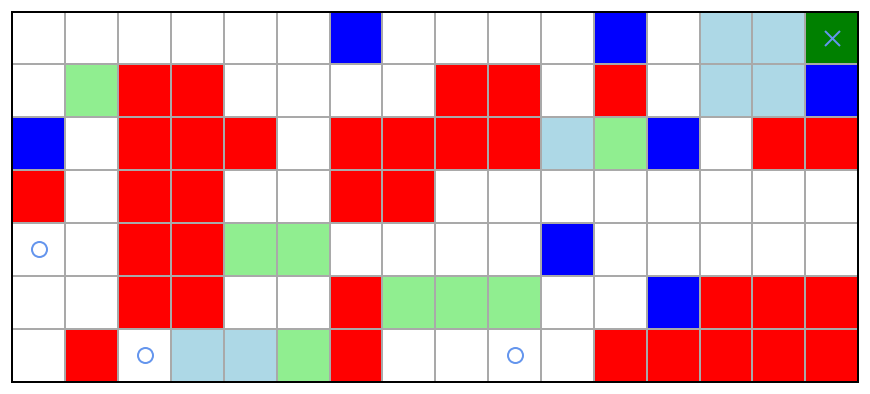

In [137]:
# Create a gridworld
mdp = GridWorld(
    tile_array=[
        "......c....c.bbg",
        ".axx....xx.x.bbc",
        "c.xxx.xxxxbac.xx",
        "x.xx..xx........",
        "s.xxaa....c.....",
        "..xx..xaaa..cxxx",
        ".xsbbax..s.xxxxx",
    ],
    feature_rewards={
        'g': 10,
        'x': -500,
        'c': -5,
        '.': 0,
        'a': 0,
        'b': 0,
    },
    absorbing_features=('g'),
    initial_features=('s'),
    discount_rate=0.99,
    step_cost=-1
)
featurecolors = {
    'g': 'green',
    'x': 'red',
    'c': 'blue',
    '.': 'white',
    'a': 'lightgreen',
    'b': 'lightblue'
}
mdp.plot(featurecolors=featurecolors)


In [141]:
features = buildFeatures(mdp)

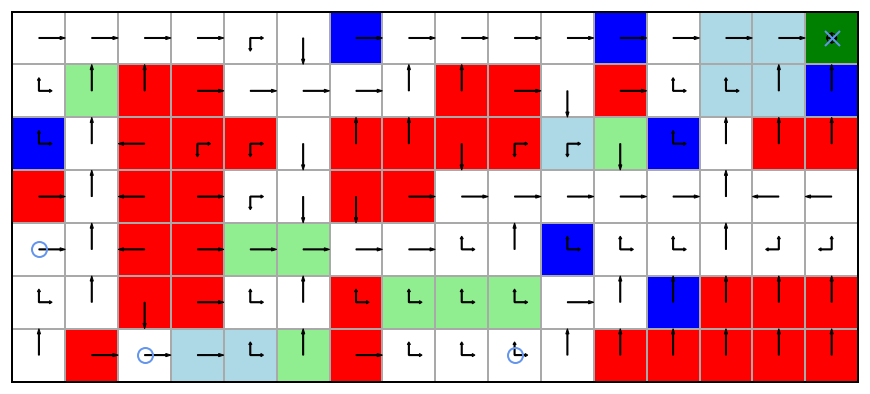

In [228]:
# Expert has a optimal policy
vi_res = ValueIteration().plan_on(mdp)
expert_policy = vi_res.policy
mdp.plot(featurecolors=featurecolors).plot_policy(expert_policy)

# Try using the policy from the Maximum Entropy Alg
# orig_params = dict(
#     transition_matrix=torch.tensor(mdp.transition_matrix),
#     reward_matrix=torch.tensor(mdp.reward_matrix),
#     discount_rate=torch.tensor(mdp.discount_rate),
#     # the lower this is, the more optimal the policy
#     entropy_weight=torch.tensor([5]),
#     n_planning_iters=10,
#     policy_prior=None,
#     initial_policy=None,
#     check_convergence=True,
#     force_nonzero_probabilities=True,
# )

# original_erpi = entropy_regularized_policy_iteration(
#     **orig_params
# )

# orig_policy = TabularPolicy.from_matrix(
#     states=mdp.state_list,
#     actions=mdp.action_list,
#     policy_matrix=original_erpi.policy.detach().numpy()
# )

# orig_state_values = dict(zip(mdp.state_list, original_erpi.state_values))
# mdp.plot(featurecolors=featurecolors).plot_policy(orig_policy)
# mdp.plot().plot_state_map(orig_state_values)


In [229]:
# Generate num_iters of trajectories
train_iters = 30
test_iters = 10
trajectories = []
test_trajectories = []

for _ in range(train_iters):
  # both will start at one of the labelled starting points
  trajectory = expert_policy.run_on(mdp)
  # trajectory = orig_policy.run_on(mdp)
  formatted_traj = {}
  formatted_traj['state_traj'] = trajectory.state_traj
  formatted_traj['action_traj'] = trajectory.action_traj
  # trajectory = {'state_traj': (1, 2, 3, 4, 5),
  #               'action_traj': (2, 7, 9, 5, 1)}
  trajectories.append(formatted_traj)

# for _ in range(test_iters):
#   test_trajectories.append(expert_policy.run_on(mdp))


In [230]:
# Get trajectory_weights
# what does it mean for a trajectory to be equal? only states are equal or both states and actions are equal
trajectory_weights = buildTrajWeights(trajectories)

In [ ]:
def maxLikelihoodIRL(mdp, features, trajectories, trajectory_weights, iters=10, lr=0.01):
  '''
  Parameters:
    mdp: a representation of the Markov Decision Process (x-coords, y-coords, color of states, and transition probabilities)
    features: S x A x S x M where the arr[i, j, k, :] = the features of taking action j in state i and transitioning to state k
    0 <= i, k <= S - 1 and 0 <= j <= A - 1
    feature_fn: function that returns the features of the current state
    trajectories: array of trajectories which are dictionaries containing the state and action trajectory
    trajectory_weights: trajectory-specific weight denoting the frequency of trajectory i
    iters: number of iterations of updating reward weights
    lr: learning rates for each iteration (scalar or array of length iters)
  Output:
    theta: the learned reward weights
  '''
  # randomize weights (randomize it with like He initialization or something)
  r_weights = torch.from_numpy(np.random.randn(features.shape[-1]))
  r_weights.requires_grad = True
  discount_rate = 0.99
  transition_matrix = torch.from_numpy(mdp.transition_matrix)
  entropy_weight = 1
  planning_iters = 10

  if len(lr) == 1:
    temp = np.full(iters, lr, dtype=np.double)
    lr = temp
  
  for i in iters:
    # build the reward matrix of the entire MDP using current reward weights
    rewards = torch.from_numpy(features @ r_weights)
    # compute the optimal policy for the current reward function
    policy = entropy_regularized_policy_iteration(transition_matrix, rewards, discount_rate, entropy_weight, planning_iters).policy
    loss = torch.tensor(0)
    # trajectory = {'state_traj': (1, 2, 3, 4, 5),
    #               'action_traj': (2, 7, 9, 5, 1)}
    for traj_i, trajectory in enumerate(trajectories):
      state_traj = trajectory.get('state_traj')
      action_traj = trajectory.get('action_traj')
      for index in range(len(state_traj)):
        state = state_traj[index]
        action = action_traj[index]
        state_index = mdp.state_index.get(state)
        action_index = mdp.action_index.get(action)
        loss += np.log(policy[state_index, action_index]) * trajectory_weights[traj_i]
    loss.backward()
    # r_weights.grad is the value of the gradient of the loss function w/ respect to r_weights
    r_weights = r_weights + lr[i] * r_weights.grad
    
  return r_weights


In [231]:
def maxLikelihoodIRL2(mdp, features, trajectories, trajectory_weights, iters=10, lr=0.01):
  '''
  Parameters:
    mdp: a representation of the Markov Decision Process (x-coords, y-coords, color of states, and transition probabilities)
    features: S x A x S x M where the arr[i, j, k, :] = the features of taking action j in state i and transitioning to state k
    0 <= i, k <= S - 1 and 0 <= j <= A - 1
    feature_fn: function that returns the features of the current state
    trajectories: array of trajectories which are dictionaries containing the state and action trajectory
    trajectory_weights: trajectory-specific weight denoting the frequency of trajectory i
    iters: number of iterations of updating reward weights
    lr: learning rates for each iteration (scalar or array of length iters)
  Output:
    theta: the learned reward weights
  '''
  # randomize weights (randomize it with like He initialization or something)
  r_weights = torch.from_numpy(np.random.randn(features.shape[-1]))
  # try true reward weights to debug
  r_weights.requires_grad = True
  discount_rate = 0.99
  transition_matrix = torch.from_numpy(mdp.transition_matrix)
  entropy_weight = 1
  planning_iters = 10
  features = torch.from_numpy(features)

  optimizer = torch.optim.SGD([r_weights], lr)

  for i in range(iters):
    optimizer.zero_grad()
    # build the reward matrix of the entire MDP using current reward weights
    rewards = features @ r_weights
    # compute the optimal policy for the current reward function
    policy = entropy_regularized_policy_iteration(
        transition_matrix, rewards, discount_rate, entropy_weight, planning_iters).policy
    loss = torch.tensor(0.0)
    # trajectory = {'state_traj': (1, 2, 3, 4, 5),
    #               'action_traj': (2, 7, 9, 5, 1)}
    for traj_i, trajectory in enumerate(trajectories):
      state_traj = trajectory.get('state_traj')
      action_traj = trajectory.get('action_traj')
      for index in range(len(state_traj)):
        state = state_traj[index]
        action = action_traj[index]
        state_index = mdp.state_index.get(state)
        action_index = mdp.action_index.get(action)
        loss -= torch.log(policy[state_index, action_index]) * trajectory_weights[traj_i]
    loss.backward()
    # r_weights.grad is the value of the gradient of the loss function w/ respect to r_weights
    optimizer.step()

  return r_weights


In [232]:
the_weights = maxLikelihoodIRL2(mdp, features, trajectories, trajectory_weights, iters=10).detach().numpy()

In [233]:
rewards = features @ the_weights

In [234]:
erpi_params = dict(
    transition_matrix=torch.tensor(mdp.transition_matrix),
    reward_matrix=torch.tensor(rewards),
    discount_rate=torch.tensor(mdp.discount_rate),
    entropy_weight=torch.tensor([5]), # the lower this is, the more optimal the policy
    n_planning_iters=10,
    policy_prior=None,
    initial_policy=None,
    check_convergence=True,
    force_nonzero_probabilities=True,
)

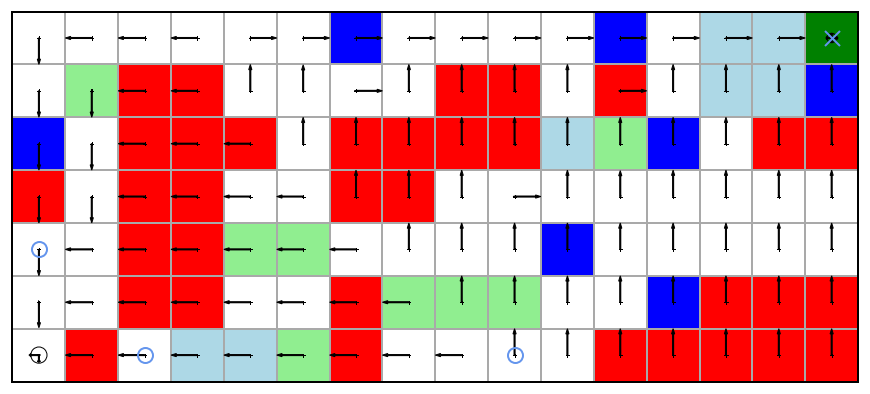

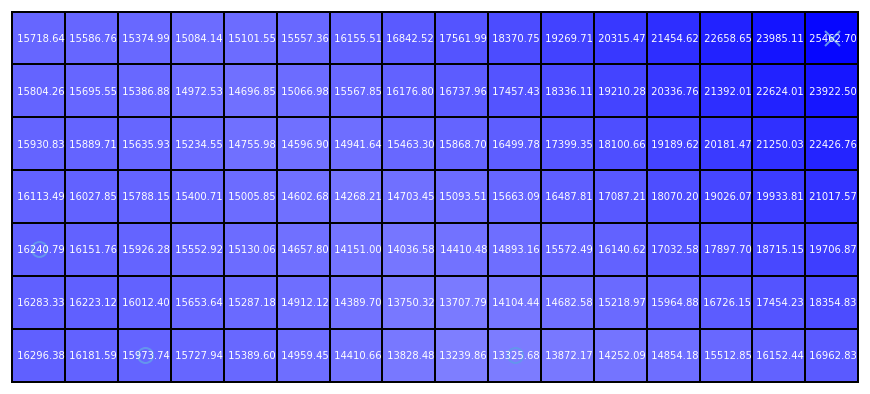

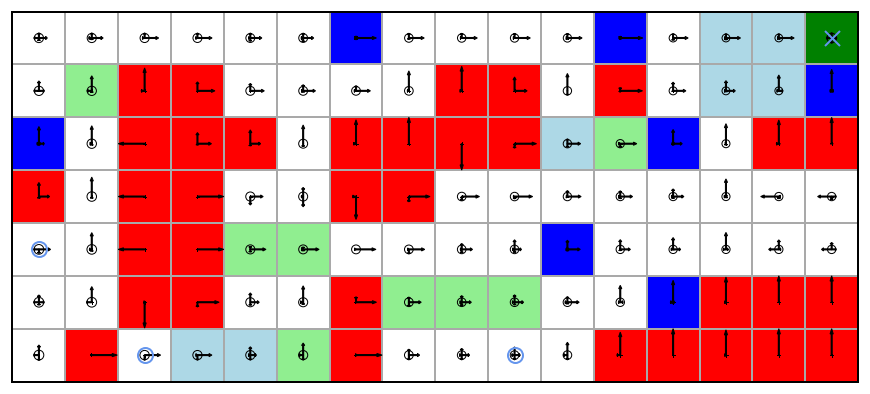

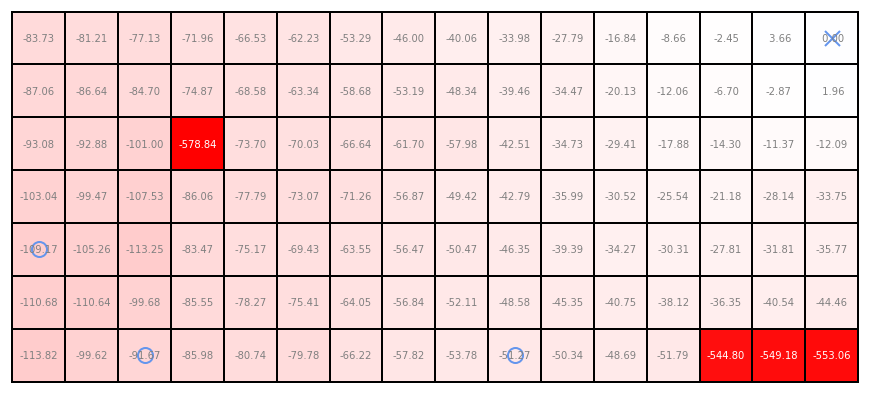

In [227]:
# solve with matrices returned by gridworld object
my_erpi = entropy_regularized_policy_iteration(
    **erpi_params
)

my_policy = TabularPolicy.from_matrix(
    states=mdp.state_list,
    actions=mdp.action_list,
    policy_matrix=my_erpi.policy.detach().numpy()
)


my_state_values = dict(zip(mdp.state_list, my_erpi.state_values))
mdp.plot(featurecolors=featurecolors).plot_policy(my_policy)
mdp.plot().plot_state_map(my_state_values)

mdp.plot(featurecolors=featurecolors).plot_policy(expert_policy)
mdp.plot().plot_state_map(orig_state_values)
